# **Import Libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Data**

In [ ]:
df=pd.read_csv('/content/traffic.csv')
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


# **EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [ ]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum()

0

# **Data Cleaning & Preprocessing**

In [ ]:
from sklearn.preprocessing import LabelEncoder
leabel_encoder =LabelEncoder()

df['Traffic Situation_numeric']=leabel_encoder.fit_transform(df['Traffic Situation'])
#df.drop('Traffic Situation', axis=1, inplace=True)
print(df['Traffic Situation_numeric'].unique())

[2 3 0 1]


In [ ]:
df['Day of the week_numeric']=leabel_encoder.fit_transform(df['Day of the week'])
#df.drop('Day of the week', axis=1, inplace=True)
print(df['Day of the week_numeric'].unique())

[5 6 4 0 2 3 1]


In [ ]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation_numeric,Day of the week_numeric
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414,1.994624,3.193548
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627,1.259307,2.007090
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000,1.000000,1.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000,3.000000,3.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000,3.000000,5.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000,3.000000,6.000000


# **Visualization**

###**Vehicle Distribution Analysis:**

What is the distribution of vehicle counts for cars, bikes, buses, and trucks?

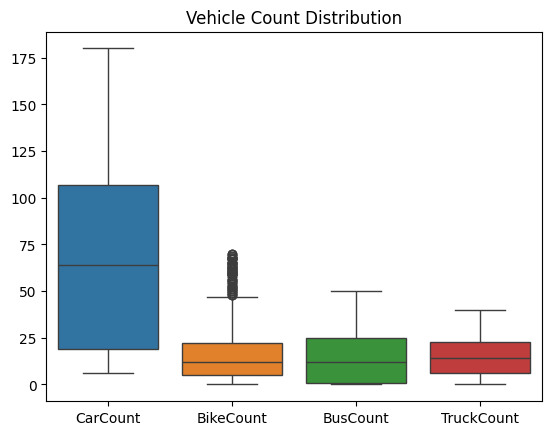

In [ ]:
vehicle_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']
sns.boxplot(data=df[vehicle_columns])
plt.title("Vehicle Count Distribution")
plt.show()

* This analysis shows that car counts are the most variable, followed by bikes, buses, and trucks, Several outliers exist above the upper quartile (above 50), indicating occasional high bike counts.

### **Traffic Situation Distribution:**

What is the distribution of traffic situations?

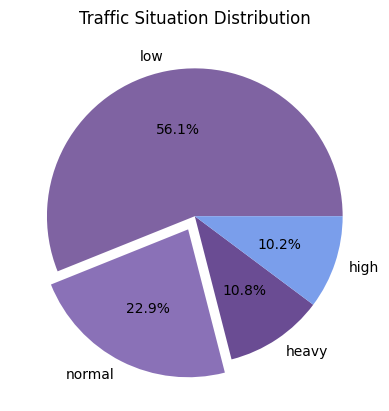

In [ ]:
plt.pie(df['Traffic Situation'].value_counts(), labels=df['Traffic Situation'].unique(), autopct='%1.1f%%',colors = [ '#7f63a2', '#8a71b7', '#6a4c93', '#7a9eeb'] ,
       explode = (0,0.1,0,0))
plt.title("Traffic Situation Distribution")
plt.show()

* low traffic is the most common, normal traffic is also relatively frequent, while high and heavy traffic situations occur less frequently.

### **Variation by Day of the Week:**

How does the vehicle count vary by day of the week?

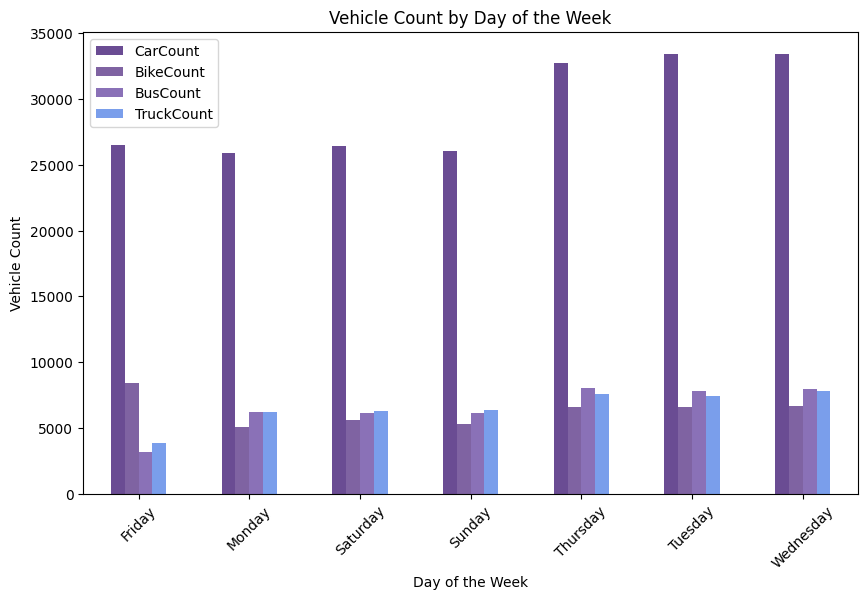

In [ ]:
# Calculate the sum of vehicle counts by day of the week
daily_vehicle_counts = df.groupby('Day of the week')[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].sum()

colors = ['#6a4c93', '#7f63a2', '#8a71b7', '#7a9eeb']
daily_vehicle_counts.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Vehicle Count by Day of the Week')
plt.ylabel('Vehicle Count')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.show()

* The number of cars recorded is higher than other vehicle types each day.

* BusCount and TruckCount are close.

* Tuesday and Thursday appear to have the highest overall vehicle counts, particularly for cars and trucks.

### **Car Count vs. Traffic Situation:**

What is the relationship between car count and traffic situation?

### **Bike Count vs. Traffic Situation:**

What is the relationship between bike count and traffic situation?

### **Bus Count vs. Traffic Situation:**
What is the relationship between bus count and traffic situation?

### **Truck Count vs. Traffic Situation:**
What is the relationship between truck count and traffic situation?

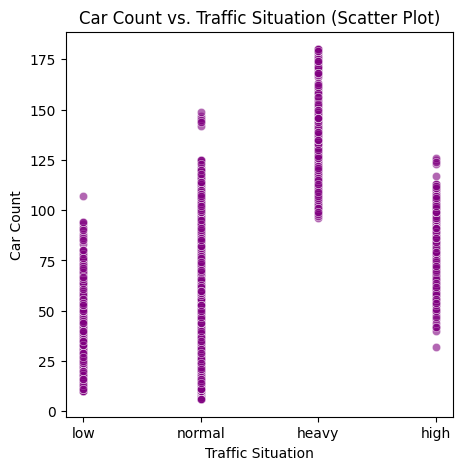

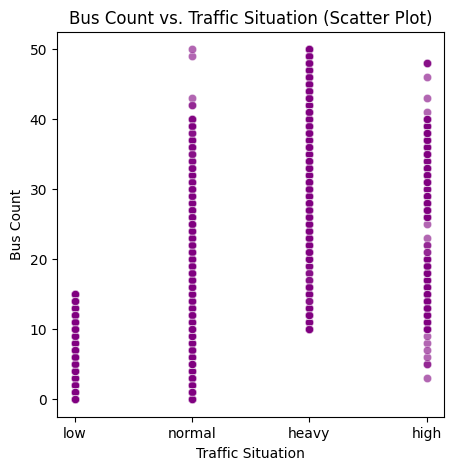

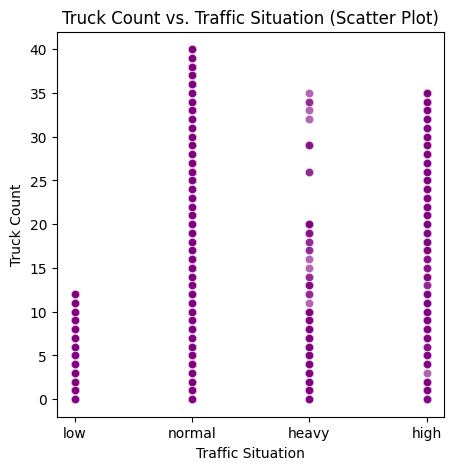

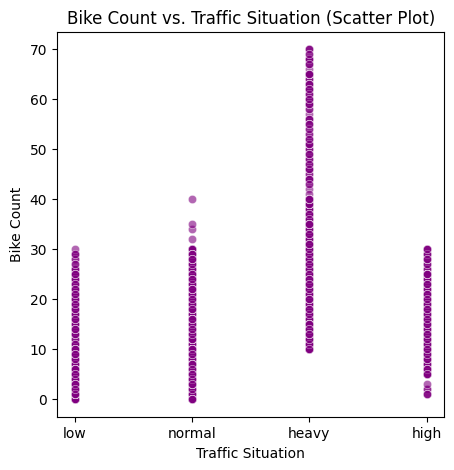

In [ ]:
# Car Count
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Traffic Situation', y='CarCount', data=df, alpha=0.6, color='purple')
plt.xlabel("Traffic Situation")
plt.ylabel("Car Count")
plt.title("Car Count vs. Traffic Situation (Scatter Plot)")
plt.show()

# Bus Count
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Traffic Situation', y='BusCount', data=df, alpha=0.6, color='purple')
plt.xlabel("Traffic Situation")
plt.ylabel("Bus Count")
plt.title("Bus Count vs. Traffic Situation (Scatter Plot)")
plt.show()

# Truck Count
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Traffic Situation', y='TruckCount', data=df, alpha=0.6, color='purple')
plt.xlabel("Traffic Situation")
plt.ylabel("Truck Count")
plt.title("Truck Count vs. Traffic Situation (Scatter Plot)")
plt.show()

# Bike Count
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Traffic Situation', y='BikeCount', data=df, alpha=0.6, color='purple')
plt.xlabel("Traffic Situation")
plt.ylabel("Bike Count")
plt.title("Bike Count vs. Traffic Situation (Scatter Plot)")
plt.show()

* The number of cars increases when traffic congestion is heavy or high

### **Total Vehicle and Count Traffic Situation:**

How does the total vehicle count vary by traffic situation?

In [ ]:
df['Total Vehicle Count'] = df['CarCount'] + df['BikeCount'] + df['BusCount'] + df['TruckCount']
summary = df.groupby('Traffic Situation')['Total Vehicle Count'].sum().reset_index()
summary

,Traffic Situation,Total Vehicle Count
0,heavy,135622
1,high,45721
2,low,19758
3,normal,138813


* Highest number of vehicles recorded in normal traffic condition

### **Busiest Hours of the Day:**

What are the busiest hours of the day for traffic?

<ipython-input-54-111d59b3d5bc>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])    # Convert the 'Time' column to datetime
<ipython-input-54-111d59b3d5bc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='Total Vehicle Count', data=hourly_traffic, palette='Purples')


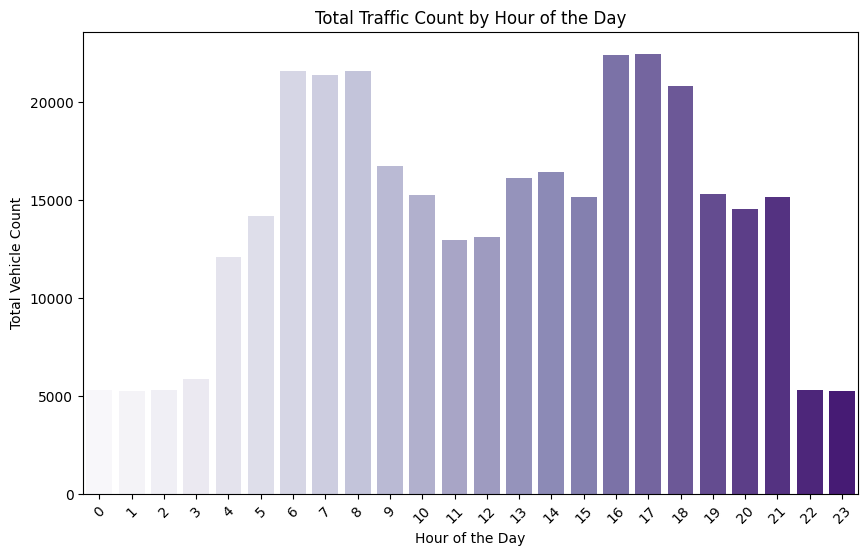

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])    # Convert the 'Time' column to datetime
df['Hour'] = df['Time'].dt.hour            # Extract the hour
df['Total Vehicle Count'] = df['CarCount'] + df['BikeCount'] + df['BusCount'] + df['TruckCount']
hourly_traffic = df.groupby('Hour')['Total Vehicle Count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='Total Vehicle Count', data=hourly_traffic, palette='Purples')
plt.title('Total Traffic Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Vehicle Count')
plt.xticks(rotation=45)
plt.show()

* Traffic volume is highest around 7 AM - 8 AM and 5 PM - 6 PM, when people commute to and from work,Traffic remains relatively high from 6 AM - 9 AM and 3 PM - 7 PM these hours likely include school drop-off/pick-up times and the beginning of evening activities.

### **traffic situation distribution**

How does traffic situation distribution vary by day of the week?


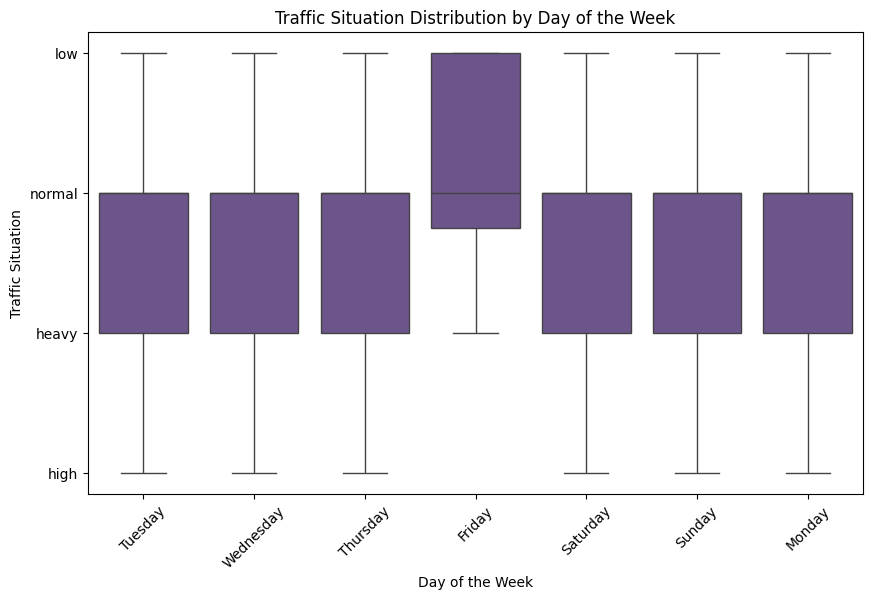

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Day of the week", y="Traffic Situation", data=df, color='#6a4c93')
plt.title("Traffic Situation Distribution by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Traffic Situation")
plt.xticks(rotation=45)
plt.show()

* Traffic might be heavier on Fridays compared to other days

### **correlations**

What are the correlations between different vehicle types?

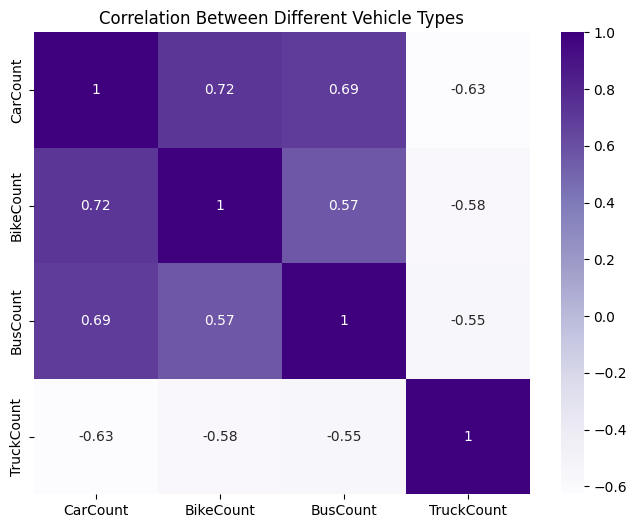

In [ ]:
vehicle_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']
corr = df[vehicle_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Purples')
plt.title("Correlation Between Different Vehicle Types")
plt.show()

###**distribution of traffic situations**

How does the distribution of traffic situations differ by hour?

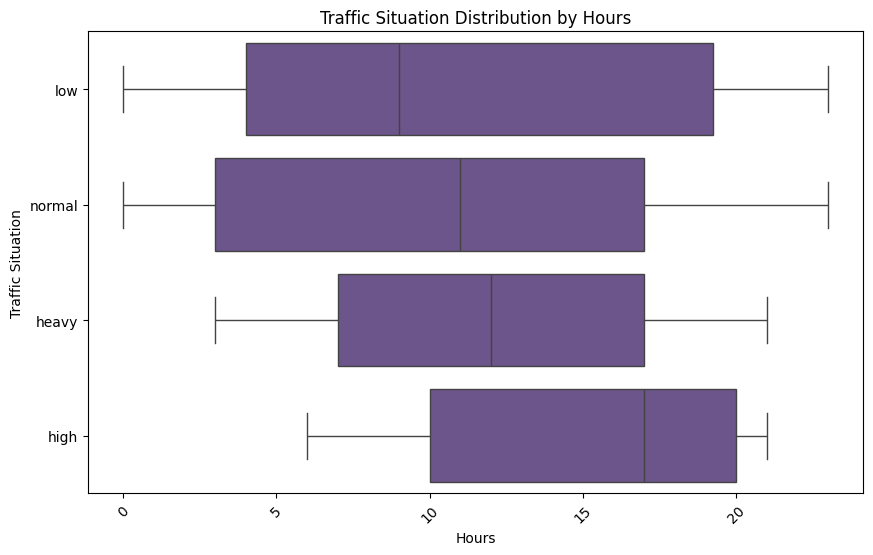

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Hour", y="Traffic Situation", data=df, color='#6a4c93')
plt.title("Traffic Situation Distribution by Hours")
plt.xlabel("Hours")
plt.ylabel("Traffic Situation")
plt.xticks(rotation=45)
plt.show()

* The distribution of traffic situations across different hours shows that traffic conditions fluctuate significantly throughout the day.

### **distribution of total vehicle counts**

What is the distribution of total vehicle counts for each day of the week?

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


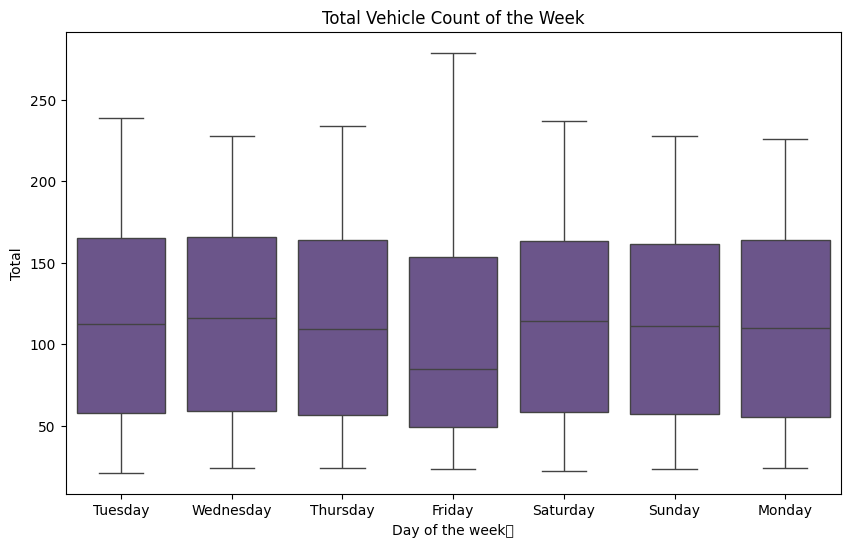

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Day of the week", y="Total", data=df, color='#6a4c93')
plt.title("Total Vehicle Count of the Week")
plt.xlabel("Day of the week	")
plt.ylabel("Total")
plt.show()

### **variance in vehicle counts**
How does the variance in vehicle counts compare across vehicle types?

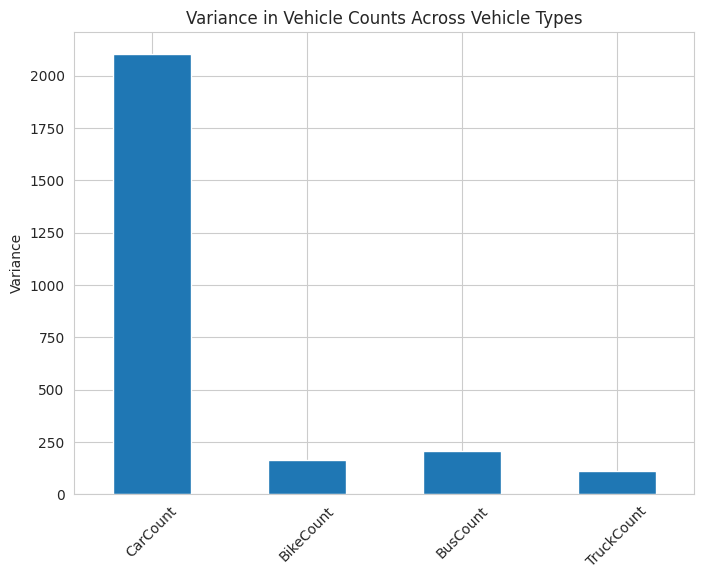

In [ ]:
# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])
df["Time"] = df["Date"].dt.hour

# Calculate variance for each vehicle type
variance = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].var()

# Plot the variance
plt.figure(figsize=(8, 6))
variance.plot(kind='bar', title="Variance in Vehicle Counts Across Vehicle Types")
plt.ylabel("Variance")
plt.show()

### **average vehicle count**
How does the average vehicle count for each type change over time?

<Figure size 1400x800 with 0 Axes>

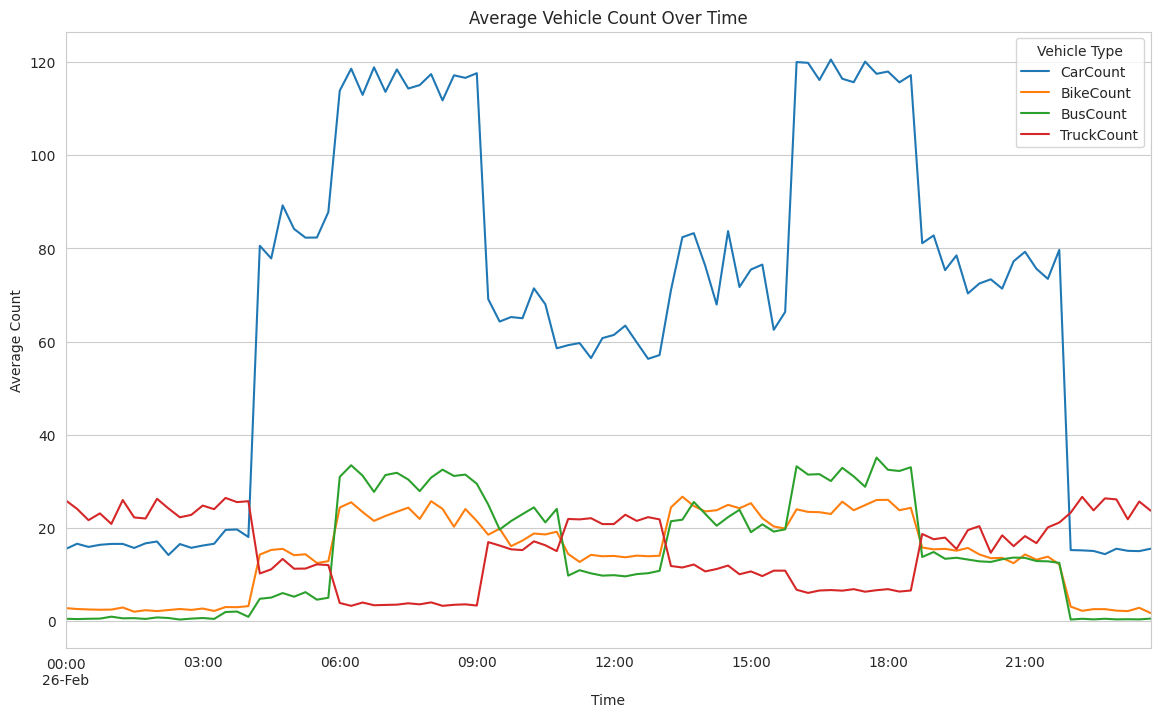

In [ ]:
# Group the data by 'Time' and calculate the mean for each vehicle type
average_vehicle_count = df.groupby('Time')[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].mean()

# Plot the average vehicle count over time
plt.figure(figsize=(14, 8))
average_vehicle_count.plot(kind='line', figsize=(14, 8))
plt.title('Average Vehicle Count Over Time')
plt.xlabel('Time')
plt.ylabel('Average Count')
plt.legend(title='Vehicle Type')
plt.show()

* Morning (6:00 AM - 9:00 AM) and Evening (3:00 PM - 6:00 PM) are peak traffic periods for all vehicle types, especially cars